#Read csv file


In [25]:
import pandas as pd
df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In this dataset, only one feature is an object type   
  and   no null type data are  present
          , this is good for us
    
   


#Data visualization

count male and female 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


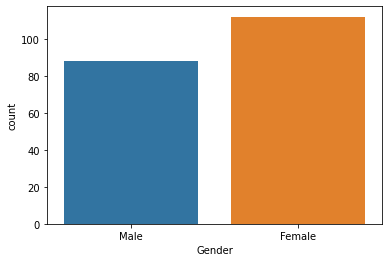

In [26]:
import seaborn as sns
sns.countplot('Gender',data=df)

So, from this plot we see the number of the female are more than the number of males, let's see how many people belong to a different age.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


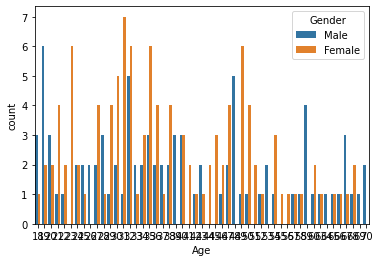

In [4]:
sns.countplot('Age',hue='Gender',data=df)

We can't understand clearly from this plot, so, zoom this plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


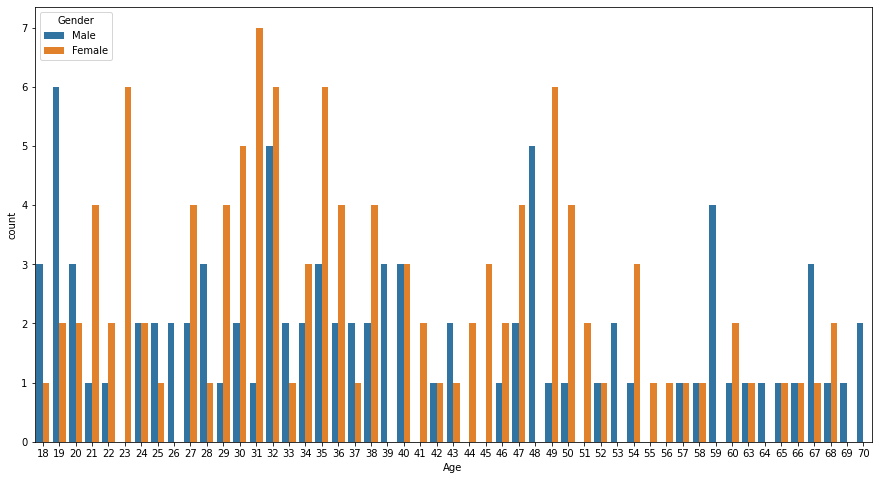

In [27]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
sns.countplot('Age',hue='Gender',data=df)

Two age ranges come the most to the mall. 1st age range is 27-38 and the second age range is 47-50.
For the age group 18,19,20, the number of males is more than the number of females.

 


let's have a similar observation on annual income

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


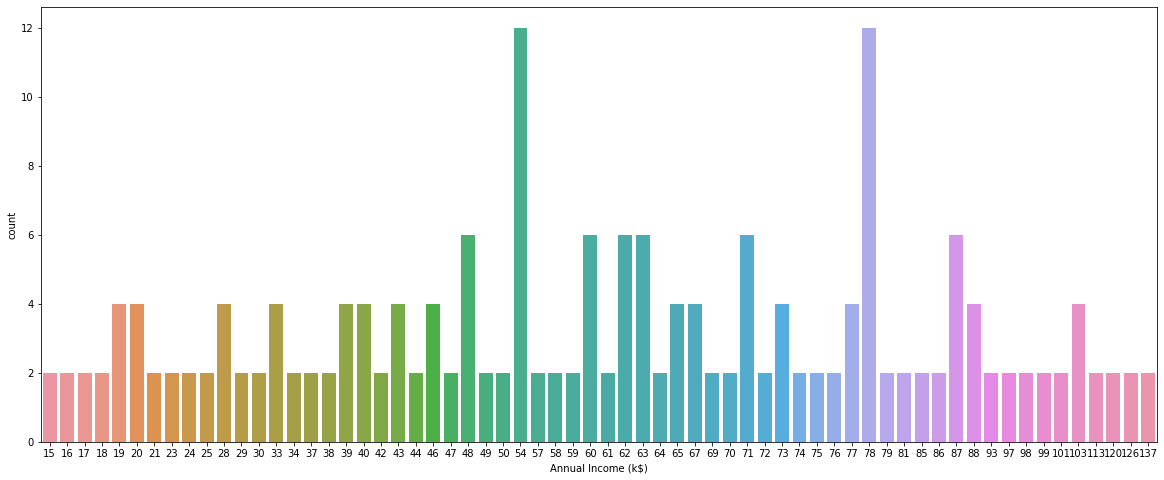

In [6]:
plt.figure(figsize=(20,8))
sns.countplot('Annual Income (k$)',data=df)

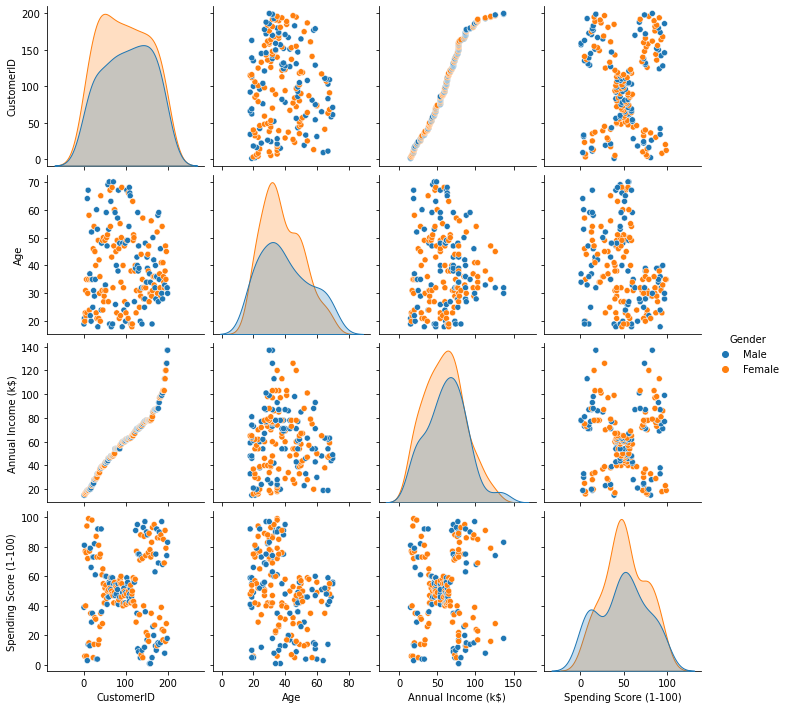

In [7]:
sns.pairplot(df,hue='Gender')

1. Here we see that Gender is not much of differentiating factor, so we can drop it
       
2. Also Customer Id do not play an important role in my dataset so we will drop this from the dataset 

In [28]:
df=df.drop(['Gender','CustomerID'],axis=1)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


#Buildling the model

In [29]:
from sklearn.cluster import KMeans
clusters=[]
for i in range(1,11):
  km= KMeans(n_clusters=i).fit(df)
  clusters.append(km.inertia_)
clusters


[308812.78,
 212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75363.74835182933,
 58302.40630860368,
 51155.24600285299,
 44307.87341670445,
 40652.356346936234,
 37466.68431549931]

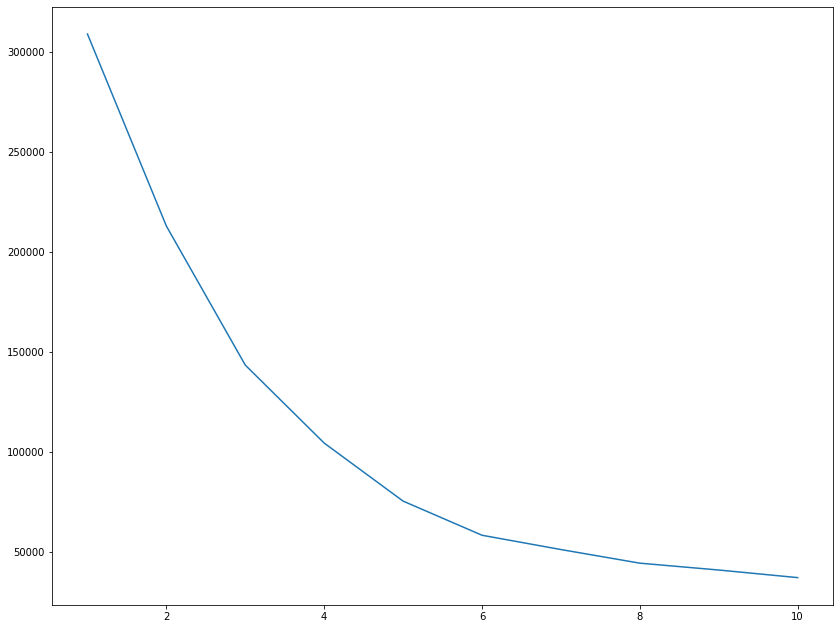

In [14]:
plt.figure(figsize=(14,11))
sns.lineplot(x=list(range(1,11)),y=clusters)

From this plot, we can see several elbows near 3,5 and 6, etc. So, the best clustering number should be one of them

let's try 3 and 5 clusters and investigate which one gives me the best insight of my model

for 3 cluster

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


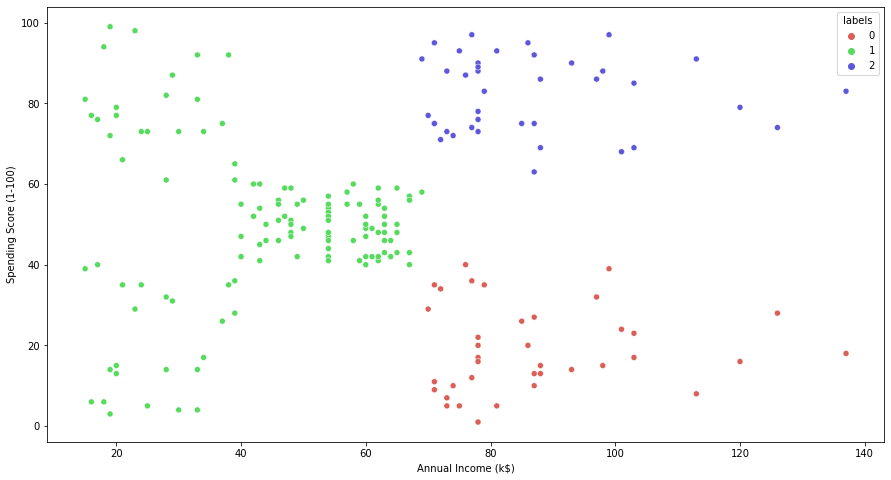

In [34]:
km3=KMeans(n_clusters=3).fit(df)
df['labels']=km3.labels_
plt.figure(figsize=(15,8))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['labels'],palette=sns.color_palette('hls', 3))
plt.show()

From this plot, we see that five clusters would be possible for a better representation of my data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


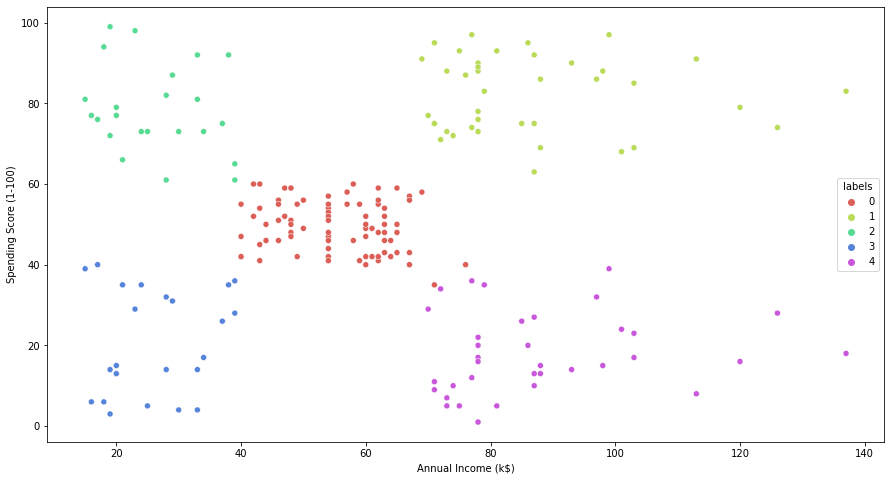

In [35]:
km5=KMeans(n_clusters=5).fit(df)
df['labels']=km5.labels_
plt.figure(figsize=(15,8))
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'],hue=df['labels'],palette=sns.color_palette('hls', 5))
plt.show()

From this plot, we can see five clusters, which represent my dataset better way. We can increase the cluster number but then we are lost the essence of clustering.